# Introduction to Vaex
Vaex is a dataframe package with a number of advantages compared to pandas
## So lets get started
In this notebook we will try and cover how to use vaex and its advantages over other data packages
# Imports
First we need to import the vaex package. You are unlikely to already have this package installed so for those using conda: cona install conda-forge:vaex

In [2]:
import vaex as vx

## Combining datasets
Vaex has the ability to open multiple datasets and combine them into one when it opens them
### For example:
We could provide a list of files

In [2]:
files= ['All_Armagh.csv', 'All_Dunsink.csv', 'All_Valentia.csv']
data= vx.open(files)

All these files are now combined

In [3]:
data

#,,Date_UTC,Site,Bx,By,Bz,E1,E2,E3,E4,TFG,TE,Volts
0,0,2016-12-20 00:00:02,arm,18284.94,-391.44,45724.56,569.8,441.36,212.21,53937.83,5.94,7.62,11.9
1,1,2016-12-20 00:00:03,arm,18284.94,-391.44,45724.58,569.26,441.37,211.87,53938.05,5.94,7.65,11.8
2,2,2016-12-20 00:00:04,arm,18284.94,-391.46,45724.58,568.77,441.38,211.7,53934.93,5.94,7.65,11.9
3,3,2016-12-20 00:00:05,arm,18284.94,-391.46,45724.56,568.35,441.4,211.81,53925.4,5.94,7.62,11.9
4,4,2016-12-20 00:00:06,arm,18284.93,-391.46,45724.54,567.94,441.4,212.15,53916.78,5.94,7.59,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"271,207,572",625,2024-06-11 10:25:00,val,19494.17,-1584.51,44889.77,--,--,--,--,--,--,--
"271,207,573",626,2024-06-11 10:26:00,val,19493.72,-1584.37,44889.56,--,--,--,--,--,--,--
"271,207,574",627,2024-06-11 10:27:00,val,19493.25,-1584.44,44889.14,--,--,--,--,--,--,--
"271,207,575",628,2024-06-11 10:28:00,val,19493.56,-1584.59,44888.86,--,--,--,--,--,--,--


Alternatively you can use star syntax to load files with a certain ending from the folder

In [4]:
data2= vx.open('*.csv')

## The memory advantage
These files combined are close 20 GB. We now have the loaded twice under different variables. If this were pandas we would struggle with loading it once while do other things on our computer. To load both would be impossible for my computer as it has 32 GB of ram.
### How does vaex do it?
The buzz word that vaex and others use is lazy loading. If you are truly interested in what that means that its worth doing reading because it seems almost like magic. The reality is lazy loading means quasi-loaded into memory. If we were to say bring a column properly into memory we would use evalaute on the column and then it would be in ram just like any other data type

In [5]:
Bx= data2['Bx'].evaluate()

Now Bx is loaded into memory. If that column takes up too much memory then doing this will crash our computer. So its worth considering this and avoiding it where ever possible.

One option is to use just a subset of the data. Lets say we just want column Bx when its January.
First we select the dataframe for that condition

In [6]:
data2.select(data2.Date_UTC.dt.month==1)

The we apply the selection when we run evaluate

In [7]:
Bx= data2['Bx'].evaluate(selection=True)

This all great but you can do all this pandas hdf files with a where clause so why is vaex more powerful is some instances. Well lets calculate the mean of column. In pandas this would not be possible without some sort of iteration and it would combursome and slow

In [8]:
Bx_mean= data2.Bx.mean()
print(Bx_mean)

18158.035546786905


This can performed on incredibly large datasets and we can use also the selection criteria we provided to find the average in January

In [9]:
Bx_mean= data2.Bx.mean(selection=True)
print(Bx_mean)

18212.411063759442


There are many functions we can provide such as min and max. The only function we might find useful that is missing is the median. This is because to perform the median we really need to have all the data in memory which vaex wants to avoid. They do provide an alternative which is median_approx which is based on a common used algorithm to is designed to negate these challenges but it does mean its not a perfect median. We can of course use evaluate on the selection criteria and use np.median if we wanted to be perfect.

You may think that because we've not loaded it fully into memory we would be limited but we can peform most operations such as multiplying columns and assigning new ones. It can be used in a very similar way to pandas.


In [10]:
data2['2Bx']= data2.Bx*2

You might notice such opertations where we assign a new column are astoundingly quick and that is because vaex will often avoid actually carrying out the operation until its necessary. It just keeps track of everything thats happened. Until it needs to use when say you use evaluate or means or when you go to the save the file

In [14]:
data2[['Date_UTC', 'Site', 'Bx', 'By', 'Bz', '2Bx']].export_hdf5('new_data.hdf5')

KeyboardInterrupt: 

In the last cell not only does it save it with the new column its also saving all the files combined into one new file

In [13]:
data2

#,,Date_UTC,Site,Bx,By,Bz,E1,E2,E3,E4,TFG,TE,Volts,2Bx
0,0,2016-12-20 00:00:02,arm,18284.94,-391.44,45724.56,569.8,441.36,212.21,53937.83,5.94,7.62,11.9,36569.88
1,1,2016-12-20 00:00:03,arm,18284.94,-391.44,45724.58,569.26,441.37,211.87,53938.05,5.94,7.65,11.8,36569.88
2,2,2016-12-20 00:00:04,arm,18284.94,-391.46,45724.58,568.77,441.38,211.7,53934.93,5.94,7.65,11.9,36569.88
3,3,2016-12-20 00:00:05,arm,18284.94,-391.46,45724.56,568.35,441.4,211.81,53925.4,5.94,7.62,11.9,36569.88
4,4,2016-12-20 00:00:06,arm,18284.93,-391.46,45724.54,567.94,441.4,212.15,53916.78,5.94,7.59,11.9,36569.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"271,207,572",625,2024-06-11 10:25:00,val,19494.17,-1584.51,44889.77,--,--,--,--,--,--,--,38988.34
"271,207,573",626,2024-06-11 10:26:00,val,19493.72,-1584.37,44889.56,--,--,--,--,--,--,--,38987.44
"271,207,574",627,2024-06-11 10:27:00,val,19493.25,-1584.44,44889.14,--,--,--,--,--,--,--,38986.5
"271,207,575",628,2024-06-11 10:28:00,val,19493.56,-1584.59,44888.86,--,--,--,--,--,--,--,38987.12


### It doesn't end here

I am now going to show you some of the functionality that I use frequently.
Here is a dataset that is over 80 GB.

In [2]:
irid= vx.open('All_Iridium.hdf5')

## Binning data
We can apply binning to different operations such as min, max, sum, count, mean. In this example we have binned in two dimensions glon and glat. We can also apply selection criteria using selection=True if wanted to. The default output is a numpy array but I have asked for an xarray which is another package that is well designed for mutlidimensional data. We will return to xarray in another tutorial.

The bining requires we give it what we want a mean of. We then provide what is going to used for binning [glon and glat]. We provide a shape (i.e. number of bins) we have 30 for glon and 20 for glat. and finally the limits (0 to 360 longitude) and (0, 90) in latitude which means we will be looking at the northern hemisphere.

In [3]:
ds= irid.mean(irid.Be, binby=[irid.glon, irid.glat], shape=(30, 20), limits=([0, 360], [0, 90]), array_type='xarray')

We can use the inbuilt plotting function and create a polar plot of the average 

/home/simon/gits/Plotting_Tools/src/Plotting_Tools/polar_plot.py:352: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(range(0, 360, 45)))


set xlim not supported 
 (0.0, 360.0)
set ylim not supported 
 (0.0, 90.0)
set_xlabel not supported 
 ('glon',)
set_ylabel not supported 
 ('glat',)


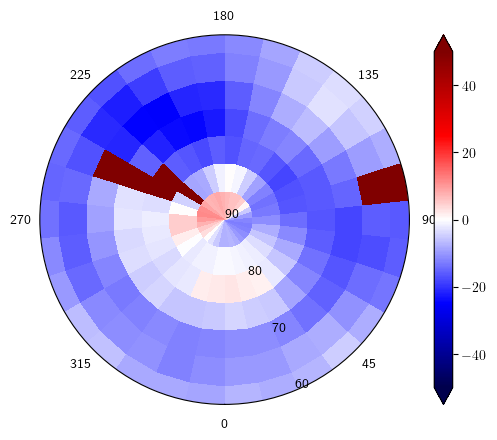

In [14]:
import matplotlib.pyplot as plt
from Plotting_Tools.polar_plot import polar
fig=plt.figure()
ax= polar(fig.add_subplot(projection='polar'), mode='geo')
pc= ds.plot.pcolormesh('glon', 'glat', ax=ax, vmin=-5e1, vmax=5e1, cmap='seismic')

## Joining Dataset
We showed that we can load multiple datasets as one. But we can also join them in other ways. Lets load each magnetometer site seperately.

In [3]:
dun= vx.open('All_Dunsink.hdf5')
arm= vx.open('All_Armagh.hdf5')

Lets rename the columns of each vector so that we don't need the site column anymore

In [4]:
dun.rename('Bx', 'Bx_dun')
dun.rename('By', 'By_dun')
dun.rename('Bz', 'Bz_dun')
dun= dun.drop(['Site'])

arm.rename('Bx', 'Bx_arm')
arm.rename('By', 'By_arm')
arm.rename('Bz', 'Bz_arm')
arm= arm.drop(['Site'])


Now lets join them on the datetime column

In [5]:
joined= dun.join(arm, on='Date_UTC')

We can now easily do operations across the two datasets

In [7]:
joined['sum_Bx']=joined['Bx_arm']+joined['Bx_dun']

We do some binining again. Here I am making two new columns month and year

In [9]:
joined['Year']=joined['Date_UTC'].dt.year

In [10]:
joined['Month']=joined['Date_UTC'].dt.month

We can use bin_edges and bin_centers to check if the shape and limits produce the bins we want

In [44]:
print('Year Bin Centers:', joined.bin_centers(joined.Year, shape=6, limits=[2019.5, 2025.5]))
print('Year Bin Edges:', joined.bin_edges(joined.Year, shape=6, limits=[2019.5, 2025.5]))
print('Month Bin Centers:', joined.bin_centers(joined.Month, shape=12, limits=[.5, 12.5]))
print('Month Bin Edges:', joined.bin_edges(joined.Month, shape=12, limits=[.5, 12.5]))


Year Bin Centers: [2020. 2021. 2022. 2023. 2024. 2025.]
Year Bin Edges: [2019.5 2020.5 2021.5 2022.5 2023.5 2024.5 2025.5]
Month Bin Centers: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Month Bin Edges: [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


Now we cna use those shapes and limits and bin the data. Again weo don't have to output xarray but I find it more useful

In [28]:
ds= joined.min(joined.sum_Bx, binby=[joined.Year, joined.Month], shape=(6, 12), limits=([2019.5, 2025.5], [.5, 12.5]), array_type='xarray')
ds.name='min'
ds2= joined.max(joined.sum_Bx, binby=[joined.Year, joined.Month], shape=(6, 12), limits=([2019.5, 2025.5], [.5, 12.5]), array_type='xarray')
ds2.name='max'

We combine the two dataarrays into one dataset

In [38]:
from xarray import Dataset
import numpy as np
ds3 = Dataset({
    "min": ds,
    "max": ds2})

There are some cases of infinite valus which I solve using this line. (it makes them nans instead)

In [39]:
ds3= ds3.where(np.isfinite(ds3))

<xarray.Dataset>
Dimensions:  (Year: 6, Month: 12)
Coordinates:
  * Year     (Year) float64 2.02e+03 2.021e+03 2.022e+03 ... 2.024e+03 2.025e+03
  * Month    (Month) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
Data variables:
    min      (Year, Month) float64 nan nan nan nan nan ... nan nan nan nan nan
    max      (Year, Month) float64 nan nan nan nan nan ... nan nan nan nan nan

Now we can pick which metric we want to plot and plot it as a pcolormesh. There are many other built in plots for xarray if we wanted to use them

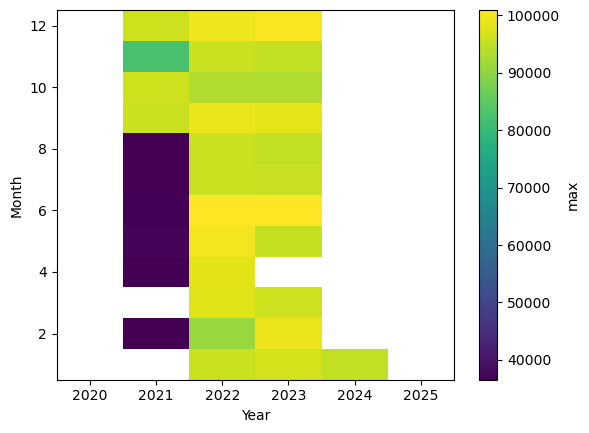

In [43]:
ds3['max'].plot.pcolormesh('Year', 'Month')